In [294]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import keras 
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential

#import dataset

titanic = pd.read_csv('titanic3.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


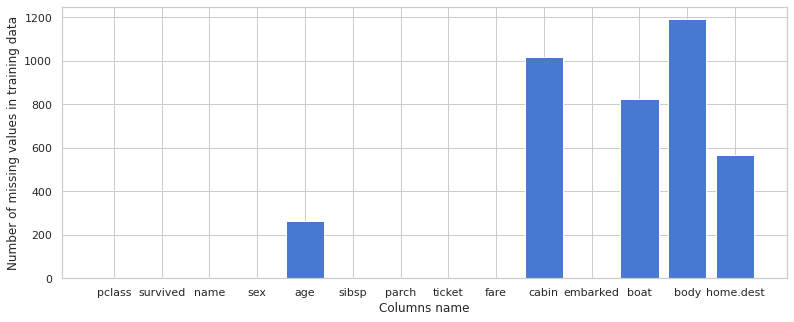

In [295]:
#from plot we come to the know the missing values which includes age, fare, cabin, embarked, boat, boady,home.dest

plt.figure(figsize = (13,5))
plt.bar(titanic.columns, titanic.isna().sum())
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in training data")
plt.show()


In [296]:
((titanic.groupby(['sex','survived']).survived.count() * 100) / titanic.groupby('sex').survived.count())

#Survival rate for male and female
#Females are more likely to survive

sex survived
female 0.0 27.253219
 1.0 72.746781
male 0.0 80.901542
 1.0 19.098458
Name: survived, dtype: float64

In [297]:
(titanic.groupby(['embarked','survived']).survived.count() * 100) / titanic.groupby('embarked').survived.count()


#Survival rate on the basis of Embarked place
#People embarking from Southampton are likely to die

embarked survived
C 0.0 44.444444
 1.0 55.555556
Q 0.0 64.227642
 1.0 35.772358
S 0.0 66.739606
 1.0 33.260394
Name: survived, dtype: float64

In [298]:
(titanic.groupby(['pclass','survived']).survived.count() * 100) / titanic.groupby('pclass').survived.count()

#Survival rate on the basis of Pclass
#We see that the people leaving in the 2nd and 3rd class is likely

pclass survived
1.0 0.0 38.080495
 1.0 61.919505
2.0 0.0 57.039711
 1.0 42.960289
3.0 0.0 74.471086
 1.0 25.528914
Name: survived, dtype: float64

In [299]:
titanic.groupby(by=['survived']).mean()['age']
#This shows that the average age of people who survived was around 

survived
0.0 30.545369
1.0 28.918228
Name: age, dtype: float64

Adding missing data in the dataset

In [300]:
#before filling the missing values, let's drop Cabin column from dataset.

titanic.drop('cabin', inplace = True, axis=1)

In [301]:

print(titanic.isnull().sum())
print('*' * 20)

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64
********************


In [302]:
#filling the nan values fo Age and fare column with the mean 


titanic.age.fillna(titanic.age.mean(), inplace = True)
titanic.fare.fillna(titanic.fare.mean(), inplace = True)

#from visualization we know that Southamptom is most frequent Embarked place so, filling the missing value 
# with 'S'
titanic.embarked.fillna('S', inplace = True)

In [303]:
def change_gender(x):
    if x == 'male':
        return 0
    elif x == 'female':
        return 1
titanic.sex = titanic.sex.apply(change_gender)

In [304]:
change = {'S':1,'C':2,'Q':0}
titanic.embarked = titanic.embarked.map(change)

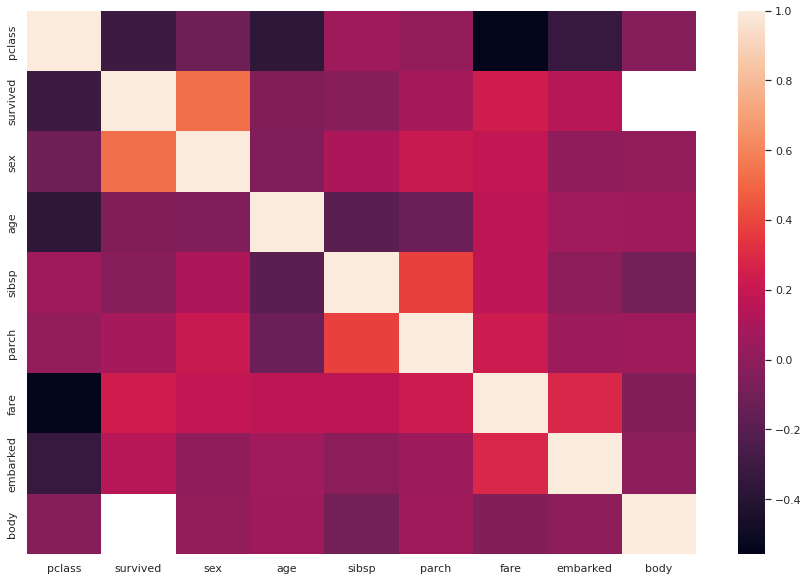

In [305]:
corr_train = titanic.corr()
sns.heatmap(corr_train)
plt.show()

In [306]:
titanic ['alone']= titanic.sibsp + titanic.parch

titanic ['alone'] = titanic.alone.apply(lambda x:1 if x == 0 else 0)

# sibsp and parch column is closely related as seen in the heatmap

# lets drop sibsp and parch column 

titanic.drop(['sibsp','parch'],inplace = True, axis = 1)

In [307]:
titanic.name.str.extract(' ([A-Za-z]+)\.', expand=False).unique().size
# there are total 19 unique title

19

In [308]:
# lets create the Title feature which contain the title of the passenger and drop Name column

titanic['title'] = titanic.name.str.extract('([A-Za-z]+)\.', expand = False)
titanic.drop('name', axis = 1, inplace = True)

In [309]:
titanic.title.value_counts()

Mr 757
Miss 260
Mrs 197
Master 61
Rev 8
Dr 8
Col 4
Mlle 2
Ms 2
Major 2
Capt 1
Sir 1
Dona 1
Jonkheer 1
Countess 1
Don 1
Mme 1
Lady 1
Name: title, dtype: int64

In [111]:
titanic.title.unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
 'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'Countess', 'Don',
 'Rev', 'Ms', nan], dtype=object)

In [310]:
#lets replace least occuring title in the data with rare
least_occuring = [ 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess','Dona',
       'Jonkheer']
titanic.title = titanic.title.replace(least_occuring,'Rare')

In [311]:
# lets perform title mapping in order to change to ordinal
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

titanic['title'] = titanic['title'].map(title_mapping)

In [312]:
#dropping the Ticket column

titanic.drop(['ticket'], axis = 1, inplace = True)

Binning age and fare column

In [313]:
titanic.loc[ titanic['age'] <= 16, 'age'] = 0
titanic.loc[(titanic['age'] > 16) & (titanic['age'] <= 32), 'age'] = 1
titanic.loc[(titanic['age'] > 32) & (titanic['age'] <= 48), 'age'] = 2
titanic.loc[(titanic['age'] > 48) & (titanic['age'] <= 64), 'age'] = 3
titanic.loc[ titanic['age'] > 64, 'age'] = 4

In [314]:
titanic.loc[titanic['fare'] < 30, 'fare'] = 1
titanic.loc[(titanic['fare'] >= 30) & (titanic['fare'] < 50),'fare'] = 2
titanic.loc[(titanic['fare'] >= 50) & (titanic['fare'] < 100),'fare'] = 3
titanic.loc[(titanic['fare'] >= 100),'fare'] = 4

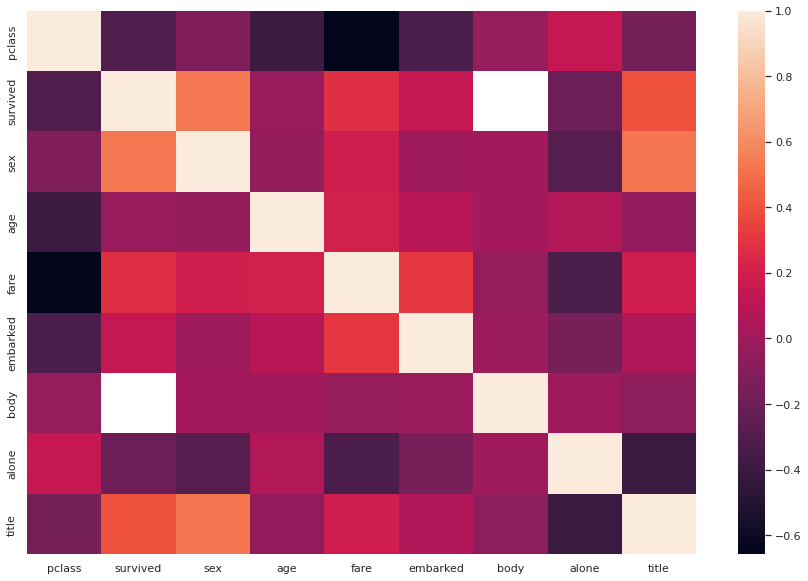

In [315]:
corr_titanic = titanic.corr()
sns.heatmap(corr_titanic)
plt.show()

Spliting the Data into Training and Testing

In [335]:
from sklearn.model_selection import train_test_split

y=titanic.survived
x=titanic.drop('survived',axis=1)

#spliting the data into training and testing sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

print('shape of original dataset:', titanic.shape)
print('shape of input-training set', x_train.shape)
print('shape of output-training set:', y_train.shape)
print('shape of input-testing set', x_test.shape)
print('shape of output-testing set', y_test.shape)

shape of original dataset: (1310, 11)
shape of input-training set (917, 10)
shape of output-training set: (917,)
shape of input-testing set (393, 10)
shape of output-testing set (393,)


In [336]:
model = Sequential()
model.add(Dense(units = 32, input_shape = (7,), activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', use_bias = False))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(units = 128, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 64, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dense(units =1 , activation = 'sigmoid'))

In [337]:
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 32)                256       
                                                                 
 dense_89 (Dense)            (None, 64)                2048      
                                                                 
 batch_normalization_11 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_90 (Dense)            (None, 128)               8192      
                                                                 
 dropout_33 (Dropout)        (None, 128)               0         
                                                                 
 dense_91 (Dense)            (None, 64)                8192      
                                                     

In [345]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['acc'])
model.fit(x_train, y_train, batch_size = 32, verbose = 2, epochs = 50)

ValueError: ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).